<a href="https://colab.research.google.com/github/Nesjesramrey/Modulo-4/blob/main/ML_Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_spotify = pd.read_csv('/content/drive/MyDrive/Ml/spotifyml.csv')
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232521 entries, 0 to 232520
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        232521 non-null  int64  
 1   genre             232521 non-null  object 
 2   artist_name       232521 non-null  object 
 3   track_name        232521 non-null  object 
 4   popularity        232521 non-null  int64  
 5   acousticness      232521 non-null  float64
 6   danceability      232521 non-null  float64
 7   energy            232521 non-null  float64
 8   instrumentalness  232521 non-null  float64
 9   liveness          232521 non-null  float64
 10  loudness          232521 non-null  float64
 11  speechiness       232521 non-null  float64
 12  tempo             232521 non-null  float64
 13  valence           232521 non-null  float64
 14  minutes           232521 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 26.6+ MB


In [ ]:
x= df_spotify[['acousticness','popularity','danceability','energy','liveness','loudness','speechiness','tempo','valence','minutes']].to_numpy()
y= df_spotify['genre'].map({
    'Comedy':0,              
    'Soundtrack':1,        
    'Indie':2,               
    'Jazz':3,                
    'Pop':4,                 
    'Electronic':5,          
    'Childrens Music':6,    
    'Hip-Hop':7,             
    'Folk':8,                
    'Alternative':9,         
    'Rock':10,                
    'Classical':11,           
    'Rap':12,                 
    'World':13,               
    'Soul':14,                
    'R&B':15,                 
    'Blues':16,               
    'Anime':17,               
    'Reggaeton':18,           
    'Ska':19,                 
    'Reggae':20,              
    'Dance':21,               
    'Country':22,             
    'Opera':23,               
    'Movie':24,   
    'A Capella':25           
}).to_numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


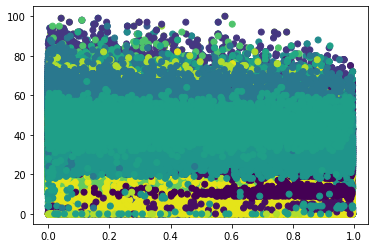

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("¡Entrenamiento completado!")

¡Entrenamiento completado!


In [ ]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

[[3519  128    1    6    1    0   29    1   20    0    0   14    0   14
     0    0    0   56    0   28    0    1    0   13   59    0]
 [ 337 1351   11   44    0    0   76    0   65    0    0  925    0  186
     0    0    1   70    0   10    0    1    0  636  186    0]
 [ 124   28  620   20  453    0  761  320  592   91  209    0    8    4
     0   89    0    0   90    6    0  401    0    0    2    0]
 [ 186  424  145  113   52    0 1213   38  345   24   46   36    2  352
     0   24    3  146  238  162   25   97    0    8   87    0]
 [  32    0  252    0 2401    0    2  559   56    2  154    0   37    1
     0   11    0    1    5    1    0  232    0    0    0    0]
 [  10   77  134   35   64    0 1523   52  125   54   45   20    1  143
     0   28    0  175  587  471   70  191    0    6   44    0]
 [  46   29  572   21  515    0  880  318  397  104  263    8    7   27
     0  104    0 1025   83  453    2  482    0   52  563    0]
 [  16    0  332    0 1966    0   44  545   90   22  19

In [ ]:
def class_accuracy(matriz_confusion):
    acc = (np.trace(matriz_confusion)/matriz_confusion.sum()) * 100
    return acc

In [ ]:
acc = class_accuracy(resultado)
print("Accuracy = " + str(acc) + "%")


Accuracy = 20.85174553000247%
